<a href="https://colab.research.google.com/github/helenksouza/helenksouza/blob/main/EstudosDaProva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$ \text{Caderno para prova} $$

In [ ]:
import numpy as np 
import plotly.express as px
import cn_utils as cn
import sympy as sp
import plotly.graph_objects as go

## Interpolação ##

A interpolação é um metodo que a partir de um determinado dado de x e de y medidos experimentalmente consegue transcrever uma função que possua como domínio e imagem esses valores.

## Quadrática
Na interpolação Quadrática há um análise de como transcrever essas medidas de forma que a função seja quadrádica. 

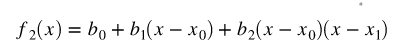

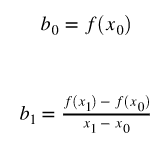


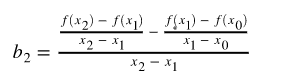

In [ ]:
# Função para achar os valores de b0 b1 e b2
def interpolacao_quadratica (x,y):
  b0 = y[0]
  b1 = (y[1] - y[0])/ (x[1] - x[0])
  b2 = ((y[2]-y[1])/(x[2] - x[1]) - b1)/(x[2] - x[0])

  return b0,b1,b2

In [ ]:

x = [1, 4, 6]
y = [0, 1.386294, 1.791759]

b0,b1,b2 = interpolacao_quadratica(x,y)

In [ ]:
f2 = lambda x: b0 + b1*(x - 1) + b2*(x-1)*(x-4)
f2(2)

0.5658441999999999

## Interpolação de Newton 
A interpolação de newton é baseada nas direnças divididas, em que os valores de d, d1, d2, ..., dn podem ser obtidos por essa operação.

$$ f(x) = d_0 + d_1 \cdot (x - x_0) + d_2 \cdot (x-x0)(x-x_1) + ... + d_n (x-x_0) (x - x_1) .... \cdot (x - x_{n-1})$$

 Os valores d, d_1, d_2 .. d_n são achados pela primeira linha correspodente da tabela que vai ser feita a interpolação a seguir: 

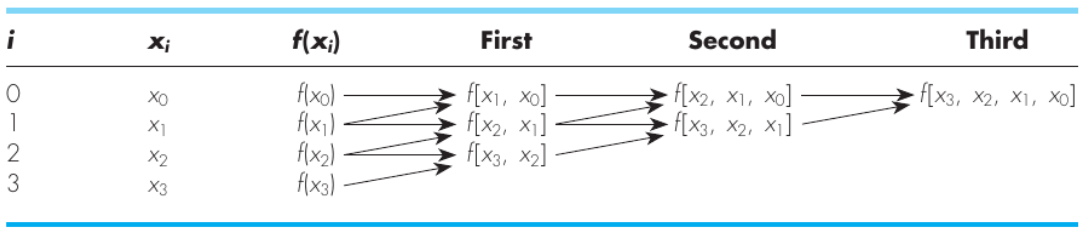

Erro : 
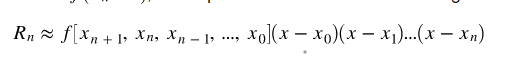

In [ ]:
## Função para calculo pelo metodo de Newton 
                    #array de x// array de y // grau // valor que quer interpolar
def newton_interpolation(x, y, n, xi, return_fdd=False, return_last=True):

    assert len(x) == len(y), 'the same size'
    assert len(x) > n, 'there is no sufficient point'
    n += 1
    
    fdd = np.zeros((len(y), len(y))) #Montando uma matriz de zero 
    fdd[:, 0] = y #pegar todas as linhas da primeira coluna

    for j in range(1, n): #j pega colunas e i linhas
        for i in range(0, n-j): #Responsavel pelo formato triagular 
            fdd[i, j] = (fdd[i+1, j-1] - fdd[i, j-1])/(x[i+j] - x[i])

    
    
    errors = np.zeros(n-1)  #vetor de erros
    ys = np.zeros(n)  #Achando o valor de y
    ys[0] = y[0]
    xterm = 1

    for i in range(1, n):
        xterm *= xi - x[i-1]
        ys[i] = (ys[i-1] + xterm * fdd[0, i]) # Valor interpolado de xi na função com n termos 
        errors[i-1] = fdd[0, i] * xterm   #Erro 
    
    if return_last:
        return ys[-1], errors[-1] #Ultimo termo de grau n e o ultimo erro 

    elif return_fdd:
      return ys, errors, fdd #Printando o fdd que é onde vai esta os coeficientes
    #Montando uma matriz que mostra fdd com zero  

    else:
        return ys, errors  #Erros e os termos 
      

In [ ]:
xx = [1, 4, 6, 5]
yy = [0, 1.386294, 1.791759, 1.609438]

In [ ]:
len(xx) > 4 


False

In [ ]:
len(yy)
len(xx)

4

In [ ]:
newton_interpolation(xx,yy,3,2,return_last=False,return_fdd=True)

NameError: ignored

## Lagrange

In [ ]:
def lagrange_interpolation(x, y, n, xi, reverse=False):

    assert len(x) == len(y), 'The same size'
    assert len(x) > n, 'for the n-degree interpolation n+1 points are needed'

    
    if reverse:     #Pega os ultimos pontos necessario para fazer a interpolação
        #L = [] 
        sum = 0
        #k = n + 1
        for i in range(len(x)-1, len(x)-n, -1):
            product = y[i]
            for j in range(len(x)-1, len(x)-n, -1):
                if i != j:
                    #L[k] = (xi - x[j])/(x[i] - x[j])
                    #k -= i 
                    product *= (xi - x[j])/(x[i] - x[j])
            sum += product # Retorna o termo xi por regressão
        #return L
        return sum
    else:
        #L  = list()
        #k = 0
        sum = 0
        for i in range(n+1):
            product = y[i]
            for j in range(n+1):
                if i != j:
                    #L.append((xi - x[j])/(x[i] - x[j]))
                    product *= (xi - x[j])/(x[i] - x[j])
            sum += product
        return sum

In [ ]:
xx = np.array([1, 4, 6, 5])
yy = np.array([0, 1.386294, 1.791759, 1.609438])

cn.newton_interpolation(xx,yy,2,3,return_fdd=True,return_last=False)



(array([0.       , 0.924196 , 1.0279422]),
 array([0.924196 , 0.1037462]),
 array([[ 0.       ,  0.462098 , -0.0518731,  0.       ],
        [ 1.386294 ,  0.2027325,  0.       ,  0.       ],
        [ 1.791759 ,  0.       ,  0.       ,  0.       ],
        [ 1.609438 ,  0.       ,  0.       ,  0.       ]]))

# Erro interpolador de Newton

In [ ]:
produto = -0.0518731
for i in range(4):
  produto = produto*(3-xx[i])
produto 

0.6224772

## Polinomial ##

Dado um conjunto $(x_i,y_i)$, com 1 $\leq$ i $\leq$ $n$ +1 pares distintos em um
intervalo [a,b]. Então, existe um único polinômio de grau $n$, $P_n(x)$, tal que
$P_n(x_i) = y_i$:

$$
P_n(x) = a_0 + a_1x + a_2x^2 +...+ a_nx^n
$$

Para $n + 1$ pontos dados, existe um e somente um polinômio de grau $n$ que passa por todos os pontos. Por exemplo, existe uma única reta (isto é, um polinômio de primeiro grau) que liga dois pontos. Analogamente, existe uma única parábola ligando um conjunto de três pontos. A interpolação polinomial consiste em determinar o único polinômio de grau n que passa pelos $n + 1$ pontos dados. Esse polinômio, então, fornece uma fórmula para calcular valores intermediários.



Exemplo: (a) Determine $P_2(x)$:
$\space$
(b) Determine $P_2(1)$:

In [ ]:
dados_x = [-1, 0, 2]
dados_y = [4, 11, -1]




fig = px.line( x= dados_x, y= dados_y, title ="Exemplo Interpolação", height = 400, width = 1000, line_shape = 'spline')
fig.show()

|$x$|$y$|
|--|--|
|-1|4|
| 0|2 |
|2|-1 |


$$P_2(x) =  a_0 + a_1(-1) + a_2(-1)^2 = 4$$

$$
a_0 + a_1(0) + a_2(0)^2 = 2
$$

$$
a_0 + a_1(2) + a_2(2)^2 = -1
$$

# Exercicio do Livro

#18.29-

In [ ]:
v = np.array([0.10377,0.11144,0.1254])
s = np.array([6.4147,6.5453,6.7664])

#a)
A = cn.lagrange_interpolation(v,s,1,0.108)
print(A)
#b)
B = cn.lagrange_interpolation(v,s,2,0.108)
print(B)

6.486725814863103
6.487525875573124


#18.5-

In [ ]:
x = np.array([1,2,3,5,7,8])
y = np.array([3,6,19,99,291,444])

for i in range(1,5):
  A = cn.newton_interpolation(x,y,i,4)
  print(A)




(12.0, 9.0)
(42.0, 30.0)
(48.0, 6.0)
(48.0, -0.0)


#18.9-

In [ ]:
# resolvendo analiticamente 

f = lambda y: (2*y/(1-y))**(1./3)

f(0.85)

2.246221366935111

In [ ]:
# resolvendo por interpolação 

#dados

x= np.array([0,1,2,3,4,5])
y = np.array([0,0.5,0.8,0.9,0.941176,0.961538])

A =lagrange_interpolation(y,x,3,0.85)
B = newton_interpolation(y,x,3,0.85)

print(A,B)

2.4437499999999996 (2.4437499999999996, 0.2479166666666664)


# Podemos ver que usando a interpolação de newton ou de lagrange chegamos no mesmo resultado

# 18.1-

a)

In [ ]:
x = np.array([8,12])
y = np.log10(x)
x,y

newton_interpolation(x,y,1,10)


(0.9911356165197842, 0.08804562952784067)

b)

In [ ]:
xx1 = np.array([9,11])
yy1 = np.log10(xx1)

newton_interpolation(xx1,yy1,1,10)

(0.9978175972987748, 0.043575087859450023)

# 18.2 

In [ ]:
x = np.array([8,9,11])
y = np.log10(x)

newton_interpolation(x,y,2,10)

(1.0003434088280854, -0.005051623058620873)

#18.3

In [ ]:
x = np.array([8,9,11,12])
y = np.log10(x)

newton_interpolation(x,y,3,10)


(1.000044924225105, -0.0002984846029802092)

# 18.4

In [ ]:
x = np.array([1.6,2,2.5,3.2,4,4.5])
y = np.array([2,8,14,15,8,2])

A = newton_interpolation(x,y,1,2.8)
B = newton_interpolation(x,y,2,2.8)
C = newton_interpolation(x,y,3,2.8)


A,B,C

((20.0, 18.0),
 (16.799999999999997, -3.2000000000000024),
 (15.814285714285713, -0.9857142857142838))

In [ ]:
# Primeiro grau:
x= np.array([2.5,3.2])
y = np.array([15,8])
A = newton_interpolation(x,y,1,2.8)

A

(12.000000000000002, -2.999999999999998)

In [ ]:
# Segundo grau:
x = np.array([2.5,3.2,4])
y = np.array([14,15,8])

B = newton_interpolation(x,y,2,2.8)
B

(15.242857142857144, 0.8142857142857147)

In [ ]:
# Terceiro grau
x = np.array([2.5,3.2,4,4.5])
y = np.array([14,15,8,2])

C = newton_interpolation(x,y,3,2.8)
C

(15.551428571428573, 0.3085714285714289)

# 18.5

In [ ]:
# Primeiro Grau

x = np.array([3,5])
y = np.array([19,99])

A = newton_interpolation(x,y,1,4)
print(A)

# Segundo Grau 
x = np.array([3,5,7])
y = np.array([19,99,291])

B = newton_interpolation(x,y,2,4)
print(B)

# Terceiro Grau
x = np.array([2,3,5,7])
y = np.array([6,19,99,291])

C = newton_interpolation(x,y,3,4)
print(C)

#Quarto Grau
x = np.array([2,3,5,7,8])
y= np.array([6,19,99,291,444])

D = newton_interpolation(x,y,4,4)
print(D)


(59.0, 40.0)
(45.0, -14.0)
(48.0, -2.0)
(48.0, 0.0)


# 18.6 

In [ ]:
x = np.array([8,9,11])
y = np.log10(x) 

lagrange_interpolation(x,y,2,10)


1.0003434088280854

## Regressão Linear


In [ ]:
x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([0.5, 2.5, 2.0, 4.0, 3.5, 6.0, 5.5])

In [ ]:

n = len(x)
xy = sum(x*y)
x_2 = sum(x**2)
x_bar = x.sum()/n
y_bar = y.sum()/n

a1 = (n*xy - x.sum()*y.sum())/(n*x_2 - x.sum()**2)

a0 = y_bar - a1*x_bar

print(f"O valor de a_0 é {a0} e a_1 é {a1}")

##Regressão Polinomial##

In [ ]:
import numpy as np
import plotly.graph_objects as go
import cn_utils as cn


##Para grau 3##
$$
y = a_0 + a_1 x + a_2 x^2 + a_3x^3 + e
$$

Minimizar a soma dos quadrados dos residos

$$
S_r = \sum_{i=1}^n (y_i - a_0 - a_1 x_i - a_2 x_i^2 -a_3x_i^3)^2
$$

$$
\frac{\partial S_r}{\partial a_0} = -2 \sum(y_i - a_0 - a_1 x_i - a_2 x_i^2 -a_3x_i^3)\\
\frac{\partial S_r}{\partial a_1} = -2 \sum x_i(y_i - a_0 - a_1 x_i - a_2 x_i^2- a_3x_i^3)\\
\frac{\partial S_r}{\partial a_2} = -2 \sum x_i^2(y_i - a_0 - a_1 x_i - a_2 x_i^2-a_3x_i^3)\\
\frac{\partial S_r}{\partial a_3} = -2 \sum x_i^3(y_i - a_0 - a_1 x_i - a_2 x_i^2-a_3x_i^3)\\
$$



$$
(n)a_0 + (\sum(x_i))a_1 + (\sum x_i^2)a_2 + (\sum x_i^3)a_3= \sum y_i \\
(\sum x_i)a_0 + (\sum x_i^2)a_1 + (\sum x_i^3)a_2 + (\sum x_i^4)a_3 = \sum x_i y_i \\
(\sum x_i^2)a_0 + (\sum x_i^3)a_1 + (\sum x_i^4)a_2 + (\sum x_i^5)a_3 = \sum x_i^2 y_i\\
(\sum x_i^3)a_0 + (\sum x_i^4)a_1 + (\sum x_i^5)a_2 + (\sum x_i^6)a_3 = \sum x_i^3 y_i\\
$$

No formato matricial

$$
A = \begin{bmatrix}
n & \sum x_i & \sum x_i^2 & \sum x_i^3\\
\sum x_i & \sum x_i^2 & \sum x_i^3 & \sum x_i^4\\
\sum x_i^2 & \sum x_i^3 & \sum x_i^4 & \sum x_i^5\\
\sum x_i^3 & \sum x_i^4 & \sum x_i^5& \sum x_i^6\\
\end{bmatrix}
$$

e o vetor $\{b\}$ é 

$$
\begin{bmatrix}
\sum y_i\\
\sum x_i y_i \\
\sum x_i^2 y_i \\
\sum x_i^3 y_i
\end{bmatrix}
$$

O caso bidimensional pode ser facilmente estendido para um polinômio de grau $m$ como

$$
y = a_0 + a_1 x + a_2 x^2 +... + a_m x^m+ e
$$

Nesse caso, o erro padrão
é formulado como

$$
s_{y/x} = \sqrt{\frac{S_r}{n - (m+1)}}
$$

In [ ]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([13,14,21,40,77,138])

m = 3
n = len(x)

#calculando os elementos do vetor b
b1 = y.sum()
b2 = sum(x*y)
b3 = sum(x**2 * y)
b4 = sum(x**3 * y)  #elemento adicional do grau 3

#calculando os elementos da matriz A
a11 = n
a12 = sum(x)
a13 = sum(x**2)
a14 = sum(x**3) #elemento adicional do grau 3

a21 = sum(x)
a22 = sum(x**2)
a23 = sum(x**3)
a24 = sum(x**4) #elemento adicional

a31 = sum(x**2)
a32 = sum(x**3)
a33 = sum(x**4)
a34 = sum(x**5) #elemento adicional

a41 = sum(x**3)
a42 = sum(x**4)
a43 = sum(x**5)
a44 = sum(x**6) #elemento adicional

bb = np.array([b1, b2, b3, b4])
AA = np.array([[a11, a12, a13, a14], [a21, a22, a23, a24], [a31, a32, a33, a34],
               [a41, a42, a43, a44]])

In [ ]:
a0, a1, a2, a3 = cn.gauss_elimination_minimal(AA, bb)

In [ ]:
a0, a1, a2, a3

(13.0, 0.0, 0.0, 1.0)

In [ ]:
cn.polinomial_regression(x,y,3,xi=None)

array([[ 1.30000000e+01],
       [ 1.81898940e-12],
       [-9.09494702e-13],
       [ 1.00000000e+00]])

In [ ]:
f = lambda x: a0 + a1*x + a2*x**2 + a3*x**3

In [ ]:
t = np.linspace(0, 5, 100)

fig = go.Figure()

fig.add_scatter(x=x, y=y, name='dados medidos', mode='markers')
#fig.add_scatter(x=x, y=f(x), mode='lines', name='modelo ajustado')
fig.add_scatter(x=t, y=f(t), mode='lines', name='modelo ajustado')


##generalizando:

In [ ]:
def regressao_general(xi,yi,n):
  n = n + 1
  A = np.empty([n,n])
  B = np.empty([n])

  for i in range(n):
    for j in range(n):
      if (i == 0 and j == 0):
        A[i,j] = n 
      A[i,j] = sum(xi**(i+j))
  
  for i in range(n):
    B[i] = sum(((xi**i)*yi))


  return A, B  



In [ ]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([13,14,21,40,77,138])
n = len(x)

A, B  =regressao_general(x,y,3)

In [ ]:
a0,a1,a2,a3 = cn.gauss_elimination_minimal(A,B)
print(a0,a1,a2,a3)

13.0 0.0 0.0 1.0


In [ ]:
f = lambda x: a0 + a1*x + a2*x**2 + a3*x**3

# Exemplo do github


In [ ]:
x = np.array([0,1,2,3,4,5])
y = np.array([2.1,7.7,13.6,27.2,40.9,61.1])

AA,bb = regressao_general(x,y,2)
a0,a1,a2 = cn.gauss_elimination_minimal(AA,bb)

print(a0,a1,a2)

2.47857142857143 2.359285714285706 1.8607142857142878


## Análise do erro dessa regressão polinomial 

Desvio padrão

In [ ]:
m = 3 # --> o grau do polinomio trabalhado 

S_r = sum((y - f(x))**2)

s_y_x = np.sqrt(S_r/(n-3))

print(f"s_y/x é {s_y_x}")

## Coeficiente de determinação 

 Quanto (%) que a regressão polinomial é mais precisa que analise por estatistica 

In [ ]:
S_t = sum((y - y.mean())**2)

r_2 = (S_t - S_r)/S_t       
r_2

## Um exemplo de grau 5 

In [ ]:
x_5 = np.array([0, 1, 2, 3, 4, 5])
y_5 = np.array([2.1, 7.7, 13.6, 27.2, 40.9, 61.1])

AA,BB = regressao_general(x_5,y_5,5)

In [ ]:
a0,a1,a2,a3,a4,a5 = cn.gauss_elimination_minimal(AA,BB)
print (a0,a1,a2,a3,a4,a5)

2.100000000010747 17.466666665706622 -22.508333331707416 13.441666665752082 -3.041666666458204 0.24166666665008074


In [ ]:
f_5 = lambda x: a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 + a5*x**5

In [ ]:
f_5(0)
f_5(1)
f_5(4)

##Erro

In [ ]:
m_5 = 5 # --> o grau do polinomio trabalhado 
n_5 = len(x_5)

S_r_5 = sum((y_5 - f_5(x_5))**2)

s_y_x_5 = np.sqrt(S_r_5/(n_5-3))

print(f"s_y/x é {s_y_x_5}")

s_y/x é 7.265107138351259e-11


## Coeficiente de Determinação

In [ ]:
S_t_5 = sum((y_5 - y_5.mean())**2)

r_2_5 = (S_t_5 - S_r_5)/S_t_5       
r_2_5

1.0

In [ ]:
x = np.array([1,2,3,4,5,6])
y = np.array([13,14,21,40,77,138])

AA,bb = regressao_general(x,y,3)
a0,a1,a2,a3 = cn.gauss_elimination_minimal(AA,bb)
print(a0,a1,a2,a3)

12.000000000001913 2.999999999997681 -2.999999999999251 0.9999999999999298


In [ ]:
x = np.array([1, 2, 3, 4, 5,6])
y = np.array([13,14,21,40,77,138])

m = 3
n = len(x)

#calculando os elementos do vetor b
b1 = y.sum()
b2 = sum(x*y)
b3 = sum(x**2 * y)
b4 = sum(x**3 * y)  #elemento adicional do grau 3

#calculando os elementos da matriz A
a11 = n
a12 = sum(x)
a13 = sum(x**2)
a14 = sum(x**3) #elemento adicional do grau 3

a21 = sum(x)
a22 = sum(x**2)
a23 = sum(x**3)
a24 = sum(x**4) #elemento adicional

a31 = sum(x**2)
a32 = sum(x**3)
a33 = sum(x**4)
a34 = sum(x**5) #elemento adicional

a41 = sum(x**3)
a42 = sum(x**4)
a43 = sum(x**5)
a44 = sum(x**6) #elemento adicional

bb = np.array([b1, b2, b3, b4])
AA = np.array([[a11, a12, a13, a14], [a21, a22, a23, a24], [a31, a32, a33, a34],
               [a41, a42, a43, a44]])
a0,a1,a2,a3 = cn.gauss_elimination_minimal(AA,bb)
print(a0,a1,a2,a3)

12.000000000001913 2.999999999997681 -2.999999999999251 0.9999999999999298


## Exercicio de Regressão do livro em Portugues 

# 17-4

# Fazendo pelo Algoritmo do Vahid :

In [ ]:
x = np.array([0,2,4,6,9,11,12,15,17,19])
y = np.array([5,6,7,6,9,8,7,10,12,12])

n = len(x)
xy = sum(x*y)
x_2 = sum(x**2)
x_bar = x.sum()/n
y_bar = y.sum()/n

a1 = (n*xy - x.sum()*y.sum())/(n*x_2 - x.sum()**2)

a0 = y_bar - a1*x_bar
a0,a1

(4.851535380507342, 0.35246995994659547)

# Algoritmo do Caio 

In [ ]:
x = np.array([0,2,4,6,9,11,12,15,17,19])
y = np.array([5,6,7,6,9,8,7,10,12,12])

AA, bb = regressao_general(x,y,1)
a0,a = cn.gauss_elimination_minimal(AA,bb)
print(a0,a)

f0 = lambda x: a*x+a0 


 

fig = go.Figure()

fig.add_scatter(x=x, y=y, name='dados medidos', mode='markers')
#fig.add_scatter(x=x, y=f(x), mode='lines', name='modelo ajustado')
fig.add_scatter(x=x, y=f0(x), mode='lines', name='modelo ajustado')

4.851535380507343 0.35246995994659547


In [ ]:
y = np.array([0,2,4,6,9,11,12,15,17,19])
x = np.array([5,6,7,6,9,8,7,10,12,12])

AA, bb = regressao_general(x,y,1)
a0,a = cn.gauss_elimination_minimal(AA,bb)


f0 = lambda x: a*x+a0 

 
fig = go.Figure()

fig.add_scatter(x=x, y=y, name='dados medidos', mode='markers')
#fig.add_scatter(x=x, y=f(x), mode='lines', name='modelo ajustado')
fig.add_scatter(x=x, y=f0(x), mode='lines', name='modelo ajustado')

# Praticamente a mesma precisao

# 17-15


In [ ]:
x = np.array([3,4,5,7,8,9,11,12])
y = np.array([1.6,3.6,4.4,3.4,2.2,2.8,3.8,4.6])

A_15,b_15 = regressao_general(x_15,y_15,3)


a0,a1,a2,a3 = cn.gauss_elimination_minimal(A_15,b_15)
print(a0,a1,a2,a3)

f_15 = lambda x: a0 + a1*x + a2*x**2 + a3*x**3

fig = go.Figure()

fig.add_scatter(x=x, y=y, name='dados medidos', mode='markers')
#fig.add_scatter(x=x, y=f(x), mode='lines', name='modelo ajustado')
fig.add_scatter(x=x, y=f_15(x), mode='lines', name='modelo ajustado')

-11.488707178891211 7.143817219170347 -1.0412069207159973 0.04667601649403619


# Comparando com o da mariana

In [ ]:
x = np.array([3,4,5,7,8,9,11,12])
y = np.array([1.6,3.6,4.4,3.4,2.2,2.8,3.8,4.6])

m = 3
n = len(x)

#calculando os elementos do vetor b
b1 = y.sum()
b2 = sum(x*y)
b3 = sum(x**2 * y)
b4 = sum(x**3 * y)  #elemento adicional do grau 3

#calculando os elementos da matriz A
a11 = n
a12 = sum(x)
a13 = sum(x**2)
a14 = sum(x**3) #elemento adicional do grau 3

a21 = sum(x)
a22 = sum(x**2)
a23 = sum(x**3)
a24 = sum(x**4) #elemento adicional

a31 = sum(x**2)
a32 = sum(x**3)
a33 = sum(x**4)
a34 = sum(x**5) #elemento adicional

a41 = sum(x**3)
a42 = sum(x**4)
a43 = sum(x**5)
a44 = sum(x**6) #elemento adicional

bb = np.array([b1, b2, b3, b4])
AA = np.array([[a11, a12, a13, a14], [a21, a22, a23, a24], [a31, a32, a33, a34],
               [a41, a42, a43, a44]])

cn.gauss_elimination_minimal(AA,bb)

array([-11.48870718,   7.14381722,  -1.04120692,   0.04667602])

# $$ r^{2} \space \space  S_{\frac{x}{u}} $$

In [ ]:
m = 3 # --> o grau do polinomio trabalhado 

S_r = sum((y_15 - f_15(x_15))**2)

s_y_x = np.sqrt(S_r/(len(x_15)-3))

print(f"s_y/x é {s_y_x}")

S_t = sum((y_15 - y_15.mean())**2)

r_2 = (S_t - S_r)/S_t       
r_2

s_y/x é 1008.7171806559193


-669413.7043094913

# Não apresenta muita precisão

## Regressão linear multipla

In [ ]:
import numpy as np
import cn_utils as cn


##Generalizando:

In [ ]:
def linear_regresion_n(tamanho,n,matriz_dados):
   i = 0
   j = 0
   #Criando as matrizes    
   A = np.empty([n+1,n+1])

   B = np.empty([n+1])

   for i in range(0,n+1):
     for j in range(0,n+1):
       if (i == 0 and j == 0):
          A[i,j] = tamanho 
       else:
          A[i,j] = sum(matriz_dados[i]*matriz_dados[j])

   for i in range(n+1):
     B[i] = sum((matriz_dados[-1])*matriz_dados[i])

   return A,B      # Sai a ordem b0,b1,b2 bn 





  

In [ ]:
matriz = np.array([[1,0,4],[7,9,4],[8,2,3]])

In [ ]:
sum(matriz[1])

20

## Exemplo 1

## Podemos observar a matriz achada pelo código do vahid e a matriz achada pelo Caio elas são iguais.

In [ ]:
n = len(x1)
a11 = n
a12 = sum(x1)
a13 = sum(x2)

a21 = a12
a22 = sum(x1**2)
a23 = sum(x1*x2)

a31 = a13
a32 = a23
a33 = sum(x2**2)

b1 = sum(y)
b2 = sum(x1*y)
b3 = sum(x2*y)

bb = np.array([b1, b2, b3])
AA = np.array([[a11, a12, a13], [a21, a22, a23], [a31, a32, a33]])

print(AA)
print(bb)

[[ 6.   16.5  14.  ]
 [16.5  76.25 48.  ]
 [14.   48.   54.  ]]
[ 54.  243.5 100. ]


In [ ]:
cn.gauss_elimination_minimal(AA,bb)

array([ 5.,  4., -3.])

In [ ]:
x1 = np.array([0, 2, 2.5, 1, 4, 7])
x2 = np.array([0, 1, 2, 3, 6, 2])
y = np.array([5, 10, 9, 0, 3, 27])

mA = np.array([[1,1,1,1,1,1],[0, 2, 2.5, 1, 4, 7],[0, 1, 2, 3, 6, 2],[5, 10, 9, 0, 3, 27]])

A_n,b_n = linear_regresion_n(6,2,mA)

print(A_n,b_n)


[[ 6.   16.5  14.  ]
 [16.5  76.25 48.  ]
 [14.   48.   54.  ]] [ 54.  243.5 100. ]


In [ ]:
cn.gauss_elimination_minimal(A_n,b_n)

array([ 5.,  4., -3.])

##Gambiarras do codigo do Caio:

##É necessário colocar a primeira linha sendo elementos unitários.
##É necessário colocar na ordem tipo x1, x2, ...,xn nas linhas 2,3,...,n+1.
## A ultima linha da matriz dado deve ser os valores de f(x1,x2,...,xn).


## Exemplo 2 

In [ ]:
x3 = np.array([1,7,9,4,8,6])
x1 = np.array([0, 2, 2.5, 1, 4, 7])
x2 = np.array([0, 1, 2, 3, 6, 2])
y = np.array([5, 10, 9, 0, 3, 27])

mA = np.array([[1,1,1,1,1,1],[0, 2, 2.5, 1, 4, 7],[0, 1, 2, 3, 6, 2],[1,7,9,4,8,6],[5, 10, 9, 0, 3, 27]])

AA, bb = linear_regresion_n(6,3,mA)

b0,b1,b2,b3 = cn.gauss_elimination_minimal(AA,bb)
print(b0,b1,b2,b3)


4.9999999999999964 4.0 -3.0000000000000027 1.5838989519741964e-15


In [ ]:
x3 = np.array([1,7,9,4,8,6])
x1 = np.array([0, 2, 2.5, 1, 4, 7])
x2 = np.array([0, 1, 2, 3, 6, 2])
y = np.array([5, 10, 9, 0, 3, 27])


n = len(x1)
a11 = n
a12 = sum(x1)
a13 = sum(x2)
a14 = sum(x3)

a21 = a12
a22 = sum(x1**2)
a23 = sum(x1*x2)
a24 = sum(x1*x3)

a31 = a13
a32 = a23
a33 = sum(x2**2)
a34 = sum(x2*x3)

a41 = a14
a42 = a24
a43 = a34
a44 = sum(x3**2)


b1 = sum(y)
b2 = sum(x1*y)
b3 = sum(x2*y)
b4 = sum(x3*y)

bb = np.array([b1, b2, b3,b4])
AA = np.array([[a11, a12, a13,a14], [a21, a22, a23,a24], [a31, a32, a33,a34],[a41,a42,a43,a44]])

In [ ]:
b0,b1,b2,b3 = cn.gauss_elimination_minimal(AA,bb)
print(b0,b1,b2,b3)

4.9999999999999964 4.0 -3.0000000000000027 1.5838989519741964e-15


# Questao 17.17

# Realizado pelo codigo do Caio 

In [ ]:
x1= np.array([0,0,1,2,0,1,2,2,1])
x2 = np.array([0,2,2,4,4,6,6,2,1])
y_ = np.array([14,21,11,12,23,23,14,6,11])

matriz_dados2 = np.array([[1,1,1,1,1,1,1,1,1],[0,0,1,2,0,1,2,2,1],[0,2,2,4,4,6,6,2,1],[14,21,11,12,23,23,14,6,11]])

In [ ]:
AA,bb = linear_regresion_n(len(x1),2,matriz_dados2)

In [ ]:
cn.gauss_elimination_minimal(AA,bb)

array([14.66666667, -6.66666667,  2.33333333])

# Código do Vahid

In [ ]:

n = len(x1)
a11 = n
a12 = sum(x1)
a13 = sum(x2)

a21 = a12
a22 = sum(x1**2)
a23 = sum(x1*x2)

a31 = a13
a32 = a23
a33 = sum(x2**2)

b1 = sum(y_)
b2 = sum(x1*y_)
b3 = sum(x2*y_)

bb = np.array([b1, b2, b3])
AA = np.array([[a11, a12, a13], [a21, a22, a23], [a31, a32, a33]])

 

b0,b1,b2 = cn.gauss_elimination_minimal(AA, bb)

b0,b1,b2

(14.666666666666666, -6.666666666666667, 2.3333333333333335)

In [ ]:
# Erro 
f_plano  = lambda x,x2: b0 + b1*x + b2*x2 
S_r_ess = sum((y_-f_plano(x1,x2))**2)

S = ( S_r_ess/(len(x1)-2))**(1/2)
St = sum((y_ - y_.mean())**2)
r2 = (St - S_r_ess)/St 

print(S_r_ess,S,r2 )

12.000000000000004 1.3093073414159544 0.9583333333333334


#17-16

In [ ]:
x1 = np.array([0,1,1,2,2,3,3,4,4])
x2 = np.array([0,1,2,1,2,1,2,1,2])
y = np.array([15.1,17.9,12.7,25.6,20.5,35.1,29.7,45.4,40.2])

matriz_dados3 = np.array([[1,1,1,1,1,1,1,1,1],[0,1,1,2,2,3,3,4,4],[0,1,2,1,2,1,2,1,2],[15.1,17.9,12.7,25.6,20.5,35.1,29.7,45.4,40.2]])
matriz_dados3
AA_16,bb_16 =linear_regresion_n(len(x1),2,matriz_dados3)

print(AA_16,bb_16)
cn.gauss_elimination_minimal(AA_16,bb_16)


[[ 9. 20. 12.]
 [20. 60. 30.]
 [12. 30. 20.]] [242.2 659.6 330.2]


array([14.46086957,  9.02521739, -5.70434783])

In [ ]:
x1 = np.array([0,1,1,2,2,3,3,4,4])
x2 = np.array([0,1,2,1,2,1,2,1,2])
y = np.array([15.1,17.9,12.7,25.6,20.5,35.1,29.7,45.4,40.2])

n = len(x1)
a11 = n
a12 = sum(x1)
a13 = sum(x2)

a21 = a12
a22 = sum(x1**2)
a23 = sum(x1*x2)

a31 = a13
a32 = a23
a33 = sum(x2**2)

b1 = sum(y)
b2 = sum(x1*y)
b3 = sum(x2*y)

bb = np.array([b1, b2, b3])
AA = np.array([[a11, a12, a13], [a21, a22, a23], [a31, a32, a33]])

print(AA,bb)
 

b0,b1,b2 = cn.gauss_elimination_minimal(AA, bb)

b0,b1,b2

[[ 9 20 12]
 [20 60 30]
 [12 30 20]] [242.2 659.6 330.2]


(14.460869565217358, 9.025217391304356, -5.704347826086944)

# Mais uma vez, podemos ver que o resultado pelo código do Vahid é o mesmo que o do Caio 

#Erro 

In [ ]:
# Erro 
f_plano  = lambda x,x2: b0 + b1*x + b2*x2 

S_r_ess = sum((y-f_plano(x1,x2))**2)
print(f'O Sr tem o valor de {S_r_ess}')

S = ( S_r_ess/(len(x1)-2))**(1/2)
print(f'O Sy_x tem o valor de {S}')

St = sum((y - y.mean())**2)

r2 = (St - S_r_ess)/St
print(f'O r2 tem o valor de  {r2}')

O Sr tem o valor de 4.739652173913031
O Sy_x tem o valor de 0.8228567115250757
O r2 tem o valor de  0.9955233462592937


# 17-12

In [ ]:
x = np.array([0.1,0.2,0.4,0.6,0.9,1.3,1.5,1.7,1.8])
y = np.array([0.75,1.25,1.45,1.25,0.85,0.55,0.35,0.28,0.18])

y_ln = np.log(y)
y_ln

AA,bb = regressao_general(x,y_ln,1)
alphaln,b4 = cn.gauss_elimination_minimal(AA,bb)

lna4 = a

SyntaxError: ignored

#17-23

In [ ]:
x_23 = np.array([26.67,93.33,148.89,315.56])
y_23 = np.array([1.35,0.085,0.012,0.00075])

x_23_log = np.log10(x_23)
y_23_log = np.log10(y_23)

AA,bb = regressao_general(x_23_log,y_23_log,1)
cn.gauss_elimination_minimal(AA,bb)


array([ 4.58147105, -3.01337553])

# 17-13

In [ ]:
c = np.array([0.5,0.8,1.5,2.5,4])
k = np.array([1.1,2.4,5.3,7.6,8.9])
p = np.empty([len(c)])
w = np.empty([len(c)])

# Fazendo as tranformações
for i in range(len(c)):
  p[i] = 1/(c[i])**2

for j in range(len(c)):
  w[j] = 1/k[j]

AA,bb = regressao_general(p,w,1)
a0,a1 = cn.gauss_elimination_minimal(AA,bb)

kMAX = 1/a0
Cs = kMAX*a1

print(f"O valor de kMAX e Cs é {kMAX,Cs} respectivamente ")

kk = lambda c: (kMAX*c**2)/(Cs + c**2)

fig = go.Figure()

fig.add_scatter(x=c, y=k, name='dados medidos', mode='markers')
#fig.add_scatter(x=x, y=f(x), mode='lines', name='modelo ajustado')
fig.add_scatter(x=c, y=kk(c), mode='lines', name='modelo ajustado')

O valor de kMAX e Cs é (10.060738546972804, 2.037188783814097) respectivamente 


#17.10-

In [ ]:
x = np.array([0.4,0.8,1.2,1.6,2,2.23])
y= np.array([800,975,1500,1950,2900,3600])

fig = go.Figure()

fig.add_scatter(x=x, y=y, name='dados medidos', mode='markers')

In [ ]:
y_ln = np.log(y)

A, b = regressao_general(x,y_ln,1)
a0, a1 = cn.gauss_elimination_minimal(A,b)

a11 = np.exp(a0)
print(f'O a1 é igual à {a11} e o b1 é {a1}')

f = lambda x: a11*np.exp(a1*x)

fig = go.Figure()

fig.add_scatter(x=x, y=y, name='dados medidos', mode='markers')
#fig.add_scatter(x=x, y=f(x), mode='lines', name='modelo ajustado')
fig.add_scatter(x=x, y=f(x), mode='lines', name='modelo ajustado')


O a1 é igual à 537.0934414400314 e o b1 é 0.8383933004942274


#17.9-

In [ ]:
x = np.array([2.5,3.5,5,6,7.5,10,12.5,15,17.5,20])
y = np.array([13,11,8.5,8.2,7,6.2,5.2,4.8,4.6,4.3])

fig = go.Figure()

fig.add_scatter(x=x, y=y, name='dados medidos', mode='markers')

In [ ]:
y_log = np.log10(y)
x_log = np.log10(x)

AA, bb = regressao_general(x_log,y_log,1)
a0,a1 = cn.gauss_elimination_minimal(AA,bb)

a2 = 10**(a0)
f = lambda x: a2*x**a1

print(f'No ponto 9 é {f(9)}')
fig = go.Figure()

fig.add_scatter(x=x, y=y, name='dados medidos', mode='markers')
#fig.add_scatter(x=x, y=f(x), mode='lines', name='modelo ajustado')
fig.add_scatter(x=x, y=f(x), mode='lines', name='modelo ajustado')


No ponto 9 é 6.451452952701601


# 17.11-

In [ ]:
x = np.array([0.4,0.8,1.2,1.6,2,2.23])
y= np.array([800,975,1500,1950,2900,3600])

fig = go.Figure()

fig.add_scatter(x=x, y=y, name='dados medidos', mode='markers')

In [ ]:
y_ln = np.log10(y)

A, b = regressao_general(x,y_ln,1)
a0, a1 = cn.gauss_elimination_minimal(A,b)

a11 = 10**(a0)
print(f'O a1 é igual à {a11} e o b1 é {a1}')

f = lambda x: a11*10**(a1*x)

fig = go.Figure()

fig.add_scatter(x=x, y=y, name='dados medidos', mode='markers')
#fig.add_scatter(x=x, y=f(x), mode='lines', name='modelo ajustado')
fig.add_scatter(x=x, y=f(x), mode='lines', name='modelo ajustado')

O a1 é igual à 537.0934414400302 e o b1 é 0.36410958406929855


#17-25

In [ ]:
t = np.array([4,8,12,16,20,24])
c = np.array([1590,1320,1000,900,650,560])


AA,bb = regressao_general(t,c,1)
a0,a1 = cn.gauss_elimination_minimal(AA,bb)

f = lambda x: a0 + a1*x


f_ = 200
c_ = (f_  - a0)/a1

print(f'Concentração final no tempo zero {f(0),c_}')

k = np.linspace(4,24,40)
fig = go.Figure()

fig.add_scatter(x=t, y=c, name='dados medidos', mode='markers')
fig.add_scatter(x=k, y=f(k), name='dados medidos',mode='lines')

Concentração final no tempo zero (1729.3333333333333, 29.49127640036731)


# 17-7

In [ ]:
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([1,1.5,2,3,4,5,8,10,13])

AA,bb = regressao_general(x,y,2)
a0,a1,a2 = cn.gauss_elimination_minimal(AA,bb)


AA_1,bb_1 = regressao_general(x,y,1)
a0_1, a1_1 = cn.gauss_elimination_minimal(AA_1,bb_1)

f_2 = lambda x: a0 + a1*x+ a2*x**2
f_1 = lambda x: a0_1 + a1_1*x

xx = np.linspace(1,9,50)

fig = go.Figure()

fig.add_scatter(x=x, y=y, name='dados medidos', mode='markers')
fig.add_scatter(x=xx, y=f_1(xx), name='função afim',mode='lines')
fig.add_scatter(x=xx, y=f_2(xx), name='função quadratica',mode='lines')

# Vendo os erros:

In [ ]:
#Primeiro grau:
S_r_ess = sum((y-f_1(x))**2)
print(f'O Sr do 1 tem  o valor de{S_r_ess}')

S = ( S_r_ess/(len(x)-2))**(1/2)
print(f'O Sy_x do 1 tem o valor de {S}')

St = sum(y - y.mean())**2

r2 = (St - S_r_ess)/St
print(f'O r2 do 1 tem o valor de  {r2}')

#Segundo Grau:
S_r_ess_2 = sum((y-f_2(x))**2)
print(f'O Sr do 2 tem o valor de {S_r_ess_2}')

S_2 = ( S_r_ess_2/(len(x)-3))**(1/2)
print(f'O Sy_x do 2 tem o valor de {S_2}')


r2_2 = (St - S_r_ess_2)/St
print(f'O r2 do 2 tem o valor de  {r2_2}')


O Sr do 1 tem  o valor de11.951388888888886
O Sy_x do 1 tem o valor de 1.3066526967183243
O r2 do 1 tem o valor de  -3.787546324640247e+30
O Sr do 2 tem o valor de 0.7132034632034631
O Sy_x do 2 tem o valor de 0.34477129211586605
O r2 do 2 tem o valor de  -2.2602319955368047e+29


# Exemplo do github ( linearização )

In [ ]:
x = np.array([1,2,3,4,5])
y = np.array([0.5,1.7,3.4,5.7,8.4])

fig = go.Figure()
fig.add_scatter(x=x, y=y, name='dados medidos', mode='markers')

In [ ]:
x_log = np.log10(x)
y_log = np.log10(y)

AA, bb = regressao_general(x_log,y_log,1)
a0,a1 = cn.gauss_elimination_minimal(AA,bb)

b1 = a1 
a11 = 10**(a0)
print(a11)
print(b1)


f = lambda x: a11*x**(b1)
fig = go.Figure()

xx = np.linspace(0,5,50)

fig.add_scatter(x=x, y=y, name='dados medidos', mode='markers')
fig.add_scatter(x=xx, y=f(xx), name='função potencia',mode='lines')

0.5009336490977487
1.7517236480773601


# Podemos observar tanto pelo grafico tanto pelos valores presentes que o modelo quadratico é melhor

#17.12-

# Regressão Não Linear

## Regressão Não Linear é aquela que não tem como fazer pelo metodo das lineares e nem das polinomiais.

## Usa-se a expansão de taylor para chegar na seguinte relação polinomial:

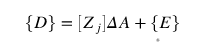


In [ ]:
import sympy as sp

In [ ]:
a1 = sp.symbols('a1')
a0 = sp.symbols('a0')

f = lambda x : a0*(1-sp.exp(-a1*x)) 

x = np.array([0.25, 0.75, 1.25, 1.75, 2.25])
y = np.array([0.28, 0.57, 0.68, 0.74, 0.79])

varis = [0.28, 0.57, 0.68, 0.74, 0.79]
parametros = [a0,a1]
A = np.array([1,1])
x= [0.25, 0.75, 1.25, 1.75, 2.25]

In [ ]:
def regressao_n_linear(n,matriz_y,xi,f):
  x = sp.symbols('x')
  f = f(x)
  


In [ ]:
x = np.array([0.25, 0.75, 1.25, 1.75, 2.25])
y = np.array([0.28, 0.57, 0.68, 0.74, 0.79])

In [ ]:
a0 = 1.
a1 = 1.

f = lambda x: a0*(1 - np.exp(-a1*x))
f0 = lambda x: 1 - np.exp(-a1 * x)
f1 = lambda x: a0 * x * np.exp(-a1 * x)

z0 = np.array([[f0(item), f1(item)] for item in x])

display(z0)

In [ ]:
z_inv = np.linalg.inv((z0.T).dot(z0))
z_inv

In [ ]:
D = y - f(x)
D

In [ ]:
zD = (z0.T).dot(D)

zD

In [ ]:

A0 = z_inv.dot(zD)
A0

In [ ]:
a0 += A0[0]
a1 += A0[1]

a0, a1

In [ ]:
import sympy as sp 


a_0, a_1, x = sp.symbols('a_0, a_1 x')
func = a_0*(1 - sp.exp(-a_1*x))
xx = np.array([0.25, 0.75, 1.25, 1.75, 2.25])
yy = np.array([0.28, 0.57, 0.68, 0.74, 0.79])
cn.gauss_newton(xx, yy, func, [x], [a_0, a_1], [1,1])

array([0.79186769, 1.67513923])

# 17.29-

In [ ]:
xx = np.array([0.1,0.2,0.4,0.6,0.9,1.3,1.5,1.7,1.8])
yy = np.array([0.75,1.25,1.45,1.25,0.85,0.55,0.35,0.28,0.18])

fig = go.Figure()

fig.add_scatter(x=xx, y=yy, name='dados medidos', mode='markers')

In [ ]:
a4,x,b4 = sp.symbols('a4 x b4')

func = a4*x*sp.exp(b4*x)
a44,b44 = cn.gauss_newton(xx, yy, func, [x], [a4, b4], [1,1])

f = lambda x:a44*x*np.exp(b44*x)

xxx = np.linspace(0,5,50)

fig.add_scatter(x=xx, y=yy, name='dados medidos', mode='markers')
fig.add_scatter(x=xxx, y=f(xxx), name='função nao linear ',mode='lines')

# 17.26-


In [ ]:
x_esse = np.array([10,20,30,40,50,60,70,80])
y_esse = np.array([25,70,380,550,610,1220,830,1450])

fig = go.Figure()

fig.add_scatter(x=x_esse, y=y_esse, name='dados medidos', mode='markers')

In [ ]:
# a) uma reta:
AA, bb = regressao_general(x_esse,y_esse,1)
a0,a1 = cn.gauss_elimination_minimal(AA,bb)

f = lambda x: a0 + a1*x

fig = go.Figure()


fig.add_scatter(x=x_esse, y=y_esse, name='dados medidos', mode='markers')
fig.add_scatter(x=x_esse, y=f(x_esse), name='função afim ',mode='lines')


In [ ]:
# b)
x_log = np.log10(x_esse)
y_log = np.log10(y_esse)

AA, bb = regressao_general(x_log,y_log,1)
a0,a1 = cn.gauss_elimination_minimal(AA,bb)

b1 = a1 
a11 = 10**(a0)
print(a11)
print(b1)


f = lambda x: a11*x**(b1)
fig = go.Figure()


fig.add_scatter(x=x_esse, y=y_esse, name='dados medidos', mode='markers')
fig.add_scatter(x=x_esse, y=f(x_esse), name='função potencia',mode='lines')

0.2741373420132209
1.984176255764013


In [ ]:
# c) Não Linear 

a1,b1,x = sp.symbols("a1 b1 x")

func = a1*x**(b1)
print(func)
a11,b11 = cn.gauss_newton(x_esse, y_esse, func, [x], [a1, b1], [1,1])

a1*x**b1


LinAlgError: ignored

#17.18-

In [ ]:
x,a0,a1,a2 = sp.symbols("x  a0 a1 a2")
f = lambda x: a2*x**2 + a1*x**1  + a0
f(x)

a0 + a1*x + a2*x**2

In [ ]:
x,a0,a1,a2 = sp.symbols("x  a0 a1 a2")
f = lambda x: a2*x**2 + a1*x**1  + a0
xx = np.array([0.2,0.5,0.8,1.2,1.7,2,2.3])
yy = np.array([500,700,1000,1200,2200,2650,3750])

cn.gauss_newton(xx,yy,f,[x],[a0,a1,a2],[1,1,1])

AttributeError: ignored

#17.24-

In [ ]:
x = np.array([0,4,8,12,16,20])
y = np.array([67,84,98,125,149,185])

fig = go.Figure()

fig.add_scatter(x=x, y=y, name='dados medidos', mode='markers')

In [ ]:
# a) Linear
AA,bb = regressao_general(x,y,1)
a0,a1 = cn.gauss_elimination_minimal(AA,bb)

f = lambda x: a0 + a1*x

fig = go.Figure()


fig.add_scatter(x=x, y=y, name='dados medidos', mode='markers')
fig.add_scatter(x=x, y=f(x), name='função afim',mode='lines')


In [ ]:
AA,bb = regressao_general(x,y,2)
a0,a1,a2 = cn.gauss_elimination_minimal(AA,bb)

f = lambda x: a0 + a1*x + a2*x**2

fig = go.Figure()


fig.add_scatter(x=x, y=y, name='dados medidos', mode='markers')
fig.add_scatter(x=x, y=f(x), name='função quadratica',mode='lines')


In [ ]:
a1,b1,x = sp.symbols("a1 b1 x")

func = a1*sp.exp(b1*x)

a44,b44 = cn.gauss_newton(x, y, func, [x], [a1, b1], [1,1])

f = lambda x: a44*np.exp(b44*x)


TypeError: ignored

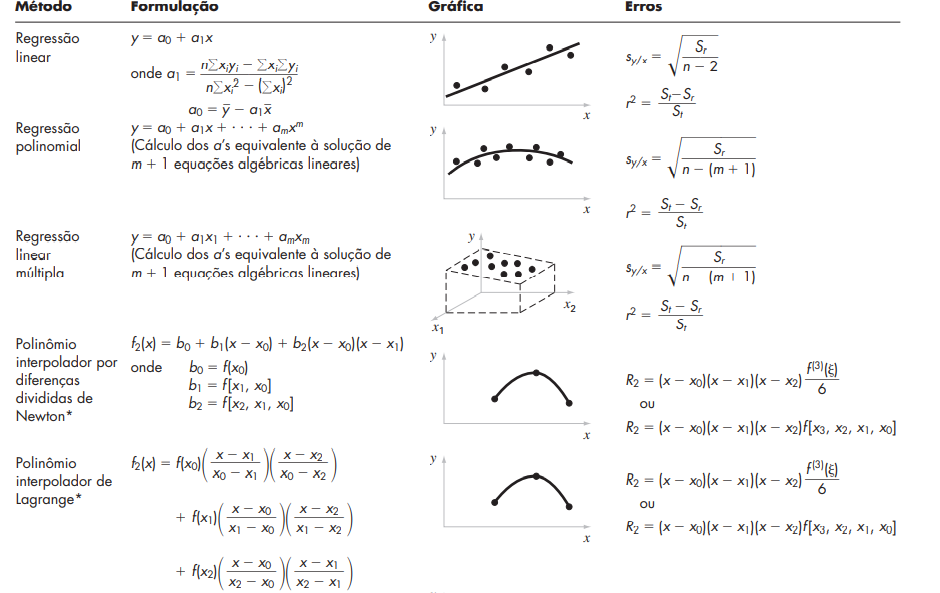

# Derivação 


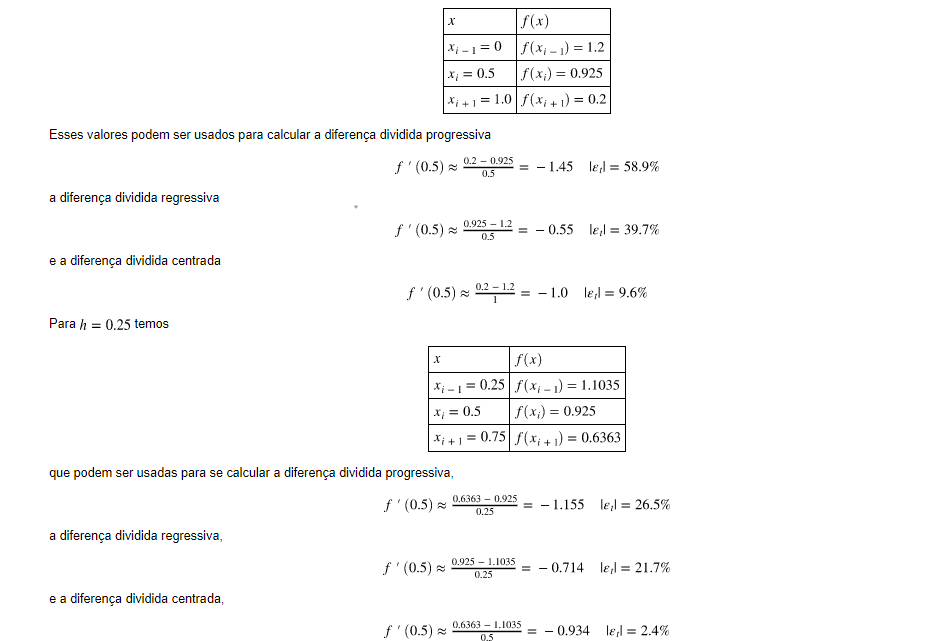

In [ ]:
def derivative(func, xi, h, method='center'):
    if method == 'center':
        return (f(xi + h) - f(xi-h))/(2*h)     # + precisa 
    elif method == 'prog':
        return  (f(xi + h) - f(xi))/(h)        #xi + h = x(i+1)  - precisa   
    elif method == 'reg':
        return (f(xi) - f(xi-h))/(h)           #xi - h = x(i-1)  +/- precisa
    else:
        print("Please choose one of the following methods: 'center', 'prog', 'reg'")

In [ ]:
# Exemplo
f = lambda x: -0.1* x**4 - 0.15 * x**3 - 0.5 * x**2 - 0.25 * x + 1.2
derivative(f, 0.5, 0.5)

-1.0

# Exercicio do Livro

# Exemplo 23.1

$$ f(x) = -0.1x^{4} - 0.15x^{3} - 0.5x^{2} - 0.25x + 1.2$$

em x = 0.5 usando o passo h=0.25

In [ ]:
import sympy as sp 

x = sp.symbols('x')
f =  lambda x: -0.1*x**4 - 0.15*x**3 - 0.5*x**2 - 0.25*x + 1.2
f_diff = f(x).diff

f_diff

<bound method Expr.diff of -0.1*x**4 - 0.15*x**3 - 0.5*x**2 - 0.25*x + 1.2>

In [ ]:

f = lambda x: -0.1*x**4 - 0.15*x**3 - 0.5*x**2 - 0.25*x + 1.2
h = 0.25

#progressiva
A = derivative(f,0.5,1,0.25,method='prog')
erro = (-0.9125-A)/(-0.9125)
print(erro*100)

#regressiva 
B = derivative(f,0.5,1,0.25,method='reg')
erro = (-0.9125-B)/(-0.9125)
print(erro*100)

#centrada
C = derivative(f,0.5,1,0.25,method='center')
erro = (-0.9125-C)/(-0.9125)
print(erro*100)

#centrada de alta precisao 
C_1 = derivative(f,0.5,1,0.25,method='center',prec="Alta")
erro = (-0.9125-C_1)/(-0.9125)
print(round(erro*100,2))

#regressiva de alta precisão:
C_2 = derivative(f,0.5,1,0.25,method='reg',prec='Alta')
erro = (-0.9125-C_2)/(-0.9125)
print(erro*100)

#progressiva de alta precisao:
C_3 = derivative(f,0.5,1,0.25,method='prog',prec='Alta')
print(C_3)
erro = (-0.9125-C_3)/(-0.9125)
print(erro)


-26.541095890410972
21.74657534246572
-2.3972602739726248
-0.0
3.7671232876712013
-0.8593750000000009
0.058219178082190785


# Derivadas Superiores

Progressiva 

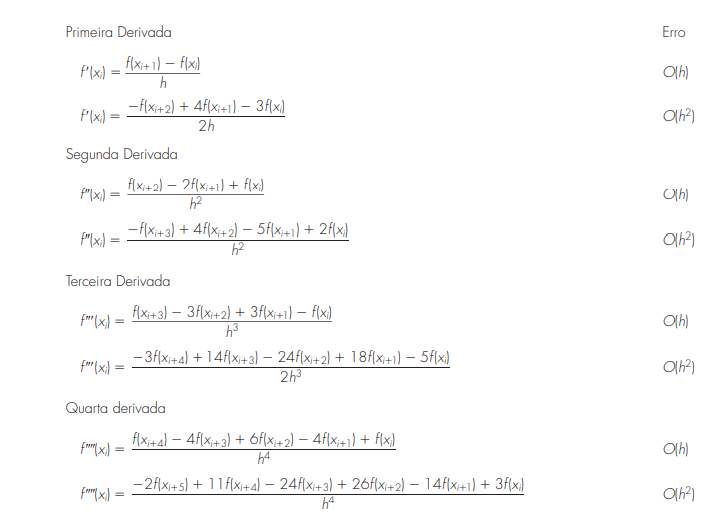

Regressiva

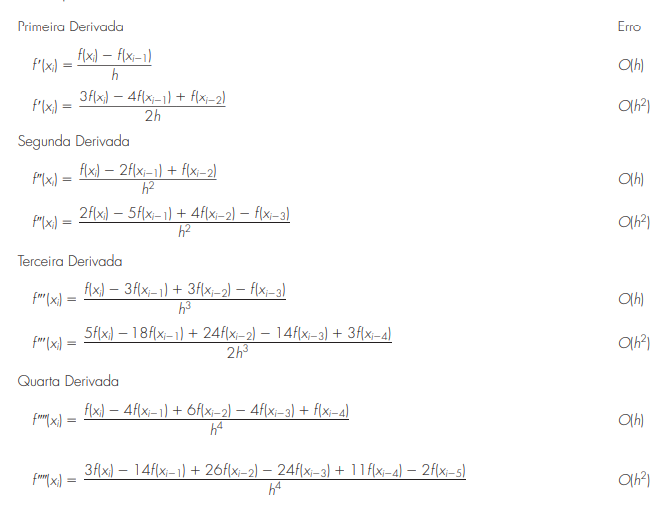

Centralizada

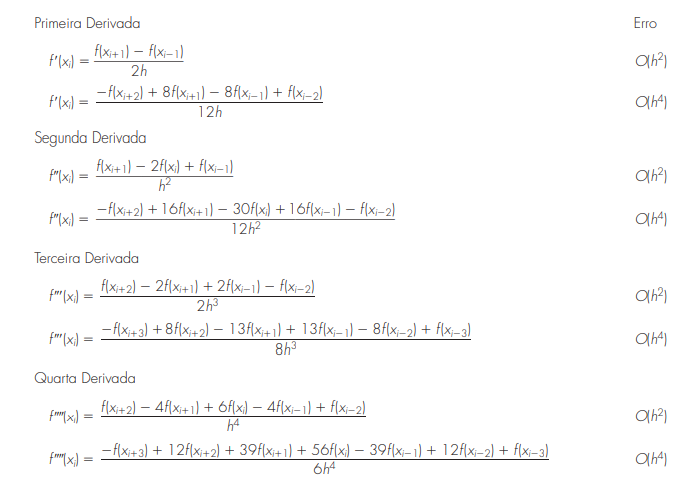

In [ ]:
def derivative(func, xi, n=1, h=0.001, method='center',prec='Baixo'):
  if n == 1:
    if method == 'center':
      if prec == 'Alta':
        return (-func(xi + 2*h)+ 8*func(xi + h)-8*func(xi - h)+func(xi-2*h))/(12*h)
      else:
        return (func(xi + h) - func(xi - h))/(2*h)
    elif method == 'prog':  
      if prec == "Alta":
        return (-func(xi + 2*h)+4*func(xi + h)- 3*func(xi))/(2*h) 
      else:
        return (func(xi + h) - func(xi))/(h)
    elif method == 'reg':
      if prec == "Alta":
        return (3*func(xi)-4*func(xi - h)+ func(xi -2*h))/(2*h)
      else:
        return (func(xi) - func(xi - h))/(h)
    else:
      print('Please choose one of the following methods: center, prog, reg')
  
  elif n == 2:
    if method == 'center':
      if prec == "Alta":
        return (-func(xi + 2*h) + 16*func(xi+h) - 30*func(xi)+16*func(xi - h) - func(xi-2*h))/(12*h**2) 
      else: 
        return (func(xi + h) - 2*func(xi) + f(xi - h))/(h**2)
    elif method == 'prog':
      return (func(xi + 2*h) - 2 * func(xi + h) + f(xi))/(h**2)
    elif method == 'reg':
      return (func(xi) - 2*func(xi - h) + f(xi - 2*h))/(h**2)
    else:
      print('Please choose one of the following methods: center, prog, reg')

# Exercicio do Livro

#23.1-

In [ ]:
f = lambda x: np.cos(x)
f_linha = lambda x: -np.sin(x)

derivada_real = f_linha(np.pi/4)
print(derivada_real)

# regressiva
A = derivative(f,(np.pi)/4,1,(np.pi)/12,method='reg')
erro_1 = (derivada_real-A)/derivada_real
print(f'A derivada achada pela regrissiva de baixa precisao é {A} com erro {erro_1}')

B = derivative(f,(np.pi)/4,1,(np.pi)/12,method='reg',prec="Alta")
erro_2 = (derivada_real-B)/derivada_real
print(f'A derivada achada pela regrissiva de alta precisao é {B} com erro {erro_2}')

#progressiva
A_ = derivative(f,(np.pi)/4,1,(np.pi)/12,method='prog')
erro_1 = (derivada_real-A_)/derivada_real
print(f'A derivada achada pela progressiva de baixa precisao é {A_} com erro {erro_1}')

B_ = derivative(f,(np.pi)/4,1,(np.pi)/12,method='prog',prec="Alta")
erro_2 = (derivada_real-B_)/derivada_real
print(f'A derivada achada pela progressiva de alta precisao é {B_} com erro {erro_2}')

#centrada 
A__ = derivative(f,(np.pi)/4,1,(np.pi)/12,method='center')
erro_3 = (derivada_real-A__)/derivada_real
print(f'A derivada achada pela central de baixa precisao é {A__} com erro {erro_3}')

B__ = derivative(f,(np.pi)/4,1,(np.pi)/12,method='center',prec="Alta")
erro_4 = (derivada_real-B__)/derivada_real
print(f'A derivada achada pela central de baixa precisao é {B__} com erro {erro_4}')

-0.7071067811865475
A derivada achada pela regrissiva de baixa precisao é -0.6070244240594338 com erro 0.14153782680343174
A derivada achada pela regrissiva de alta precisao é -0.7197408833861827 com erro -0.0178673186791319
A derivada achada pela progressiva de baixa precisao é -0.791089631368574 com erro -0.11876968573416972
A derivada achada pela progressiva de alta precisao é -0.7260127532341739 com erro -0.026737082079599964
A derivada achada pela central de baixa precisao é -0.6990570277140039 com erro 0.011384070534631011
A derivada achada pela central de baixa precisao é -0.7069969579127287 com erro 0.00015531356329877497


#23.2-

In [ ]:
f = lambda x: np.log(x)
f_linha = lambda x: 1/(x)

derivada_real = f_linha(25)
print(derivada_real)

# regressiva
A = derivative(f,25,1,2,method='reg')
erro_1 = (derivada_real-A)/derivada_real
print(f'A derivada achada pela regrissiva de baixa precisao é {A} com erro {erro_1}')

B = derivative(f,25,1,2,method='reg',prec="Alta")
erro_2 = (derivada_real-B)/derivada_real
print(f'A derivada achada pela regrissiva de alta precisao é {B} com erro {erro_2}')

#progressiva
A_ = derivative(f,25,1,2,method='prog')
erro_1 = (derivada_real-A_)/derivada_real
print(f'A derivada achada pela progressiva de baixa precisao é {A_} com erro {erro_1}')

B_ = derivative(f,25,1,2,method='prog',prec="Alta")
erro_2 = (derivada_real-B_)/derivada_real
print(f'A derivada achada pela progressiva de alta precisao é {B_} com erro {erro_2}')

#centrada 
A__ = derivative(f,25,1,2,method='center')
erro_3 = (derivada_real-A__)/derivada_real
print(f'A derivada achada pela central de baixa precisao é {A__} com erro {erro_3}')

B__ = derivative(f,25,1,2,method='center',prec="Alta")
erro_4 = (derivada_real-B__)/derivada_real
print(f'A derivada achada pela central de alta precisao é {B__} com erro {erro_4}')

0.04
A derivada achada pela regrissiva de baixa precisao é 0.041690804469525444 com erro -0.042270111738136086
A derivada achada pela regrissiva de alta precisao é 0.03979326215285639 com erro 0.005168446178590268
A derivada achada pela progressiva de baixa precisao é 0.03848052056806428 com erro 0.03798698579839301
A derivada achada pela progressiva de alta precisao é 0.039856039856560166 com erro 0.0035990035859958733
A derivada achada pela central de baixa precisao é 0.04008566251879486 com erro -0.002141562969871537
A derivada achada pela central de alta precisao é 0.039998658680766 com erro 3.353298085005674e-05


#23.3-

In [ ]:
f = lambda x: np.exp(x)
derivada_real = f(2)
print(f'A derivada real é {derivada_real}')

#primeira ordem:
A = derivative(f,2,1,0.1,method='center', prec='Alta')
print(f'A primeira derivada de alta acurácia é {A}')

B = derivative(f,2,1,0.1,method='center')
print(f'A primeira derivada de baixa acurácia é {B}')

#segunda ordem 
D = derivative(f,2,2,0.1,method='center',prec='Alta')
print(f'A segunda derivada de alta acurácia é {D}')

E = derivative(f,2,2,0.1)
print(f'A segunda derivada de baixa acurácia é {E}')

A derivada real é 7.38905609893065
A primeira derivada de alta acurácia é 7.389031439404905
A primeira derivada de baixa acurácia é 7.401377351441916
A segunda derivada de alta acurácia é 7.389047881534537
A segunda derivada de baixa acurácia é 7.395215698561939


# 23.8-
a)

In [ ]:
5f = lambda x: x**3 + 4*x - 15 

A = derivative(f,0,1,0.25,method='center',prec='Alta')
print(A)


4.0


b)

In [ ]:
f = lambda x: (x**2)*np.cos(x)

B = derivative(f,0.4,1,0.1,method='center',prec='Alta')
print(B)

0.6745039111303953


c)

In [ ]:
f = lambda x: np.tan(x/3)

C= derivative(f,3,1,0.5,method='center',prec='Alta')
print(C)

1.092485909485142


d)

In [ ]:
f = lambda x: np.sin(0.5*(x)**(0.5))/x

D = derivative(f,1,1,0.2,method="center",prec="Alta")
print(D)

-0.2590808047154513


e)

In [ ]:
f = lambda x: np.exp(x) + x 

E = derivative(f,2,1,0.2,method='center',prec='Alta')
print(E)

8.388660134967882


#23.9-

In [ ]:
# Em zero 
# Velocidade instantanea
x = np.array([0,25,50,75,100])
y = np.array([0,32,58,78,92])
h = x[2] - x[1]
print(h)
for i in range(len(x)-1):
  f_linha = (y[i+1] - y[i])/h
  print(f'A derivada no ponto {i} é  {f_linha}')

f_linha_ult = (y[len(x)-1]-y[len(x)-2])/h
print(f'A derivada no ponto {len(x)-1} é  {f_linha_ult}')

#aceleração
for i in range(len(x)-2):
  f_duaslinhas = (y[i+2]-y[i+1]+y[i])/(h**2)
  print(f'A derivada segunda no ponto {i} é  {f_duaslinhas}')

for i in range(len(x)-2,len(x)):
  f_duaslinhas = (y[i]-2*y[i-1]+y[i-2]/(h**2))
  print(f'A derivada segunda no ponto {i} é  {f_duaslinhas}')



25
A derivada no ponto 0 é  1.28
A derivada no ponto 1 é  1.04
A derivada no ponto 2 é  0.8
A derivada no ponto 3 é  0.56
A derivada no ponto 4 é  0.56
A derivada segunda no ponto 0 é  0.0416
A derivada segunda no ponto 1 é  0.0832
A derivada segunda no ponto 2 é  0.1152
A derivada segunda no ponto 3 é  -37.9488
A derivada segunda no ponto 4 é  -63.9072


# Integração 

##-Soma de Riemann (right, left, center)
##-Trapézio 
##-$ \frac {1}{3} $ Simpson (intervalos%2 = 0 ) 
##-$ \frac {3}{8} $ Simpson (intervalos multiplos de 3  )


In [ ]:
def riemann_sum(func,a,b,N,method='midpoint'):
    '''Compute the Riemann sum of f(x) over the interval [a,b].
    
    Credit to: https://www.math.ubc.ca/~pwalls/math-python/integration/riemann-sums/
    
    Parameters
    ----------
    `func` : function
        Vectorized function of one variable
    `a` , `b` : numbers
        Endpoints of the interval [a,b]
    `N` : integer
        Number of subintervals of equal length in the partition of [a,b]
    `method` : string
        Determines the kind of Riemann sum:
        `right` : Riemann sum using right endpoints
        `left` : Riemann sum using left endpoints
        `midpoint` (default) : Riemann sum using midpoints

    Returns
    -------
    float
        Approximation of the integral given by the Riemann sum.
    '''
    a, b = float(a), float(b)
    dx = (b - a)/N
    x = np.linspace(a,b,N+1)   #Criando os pontos 
    
    #var = list(func.free_symbols)[0]
    #f_np = sp.lambdify(var, func)

    if method == 'left':
        x_left = x[:-1]
        return np.sum(func(x_left)*dx)
    elif method == 'right':
        x_right = x[1:]
        return np.sum(func(x_right)*dx)
    elif method == 'midpoint':
        x_mid = (x[:-1] + x[1:])/2
        return np.sum(func(x_mid)*dx)
    else:
        raise ValueError("Method must be 'left', 'right' or 'midpoint'.")

$$ \int^2_0 \cos(x) +2   $$

In [ ]:
func = lambda x: np.cos(x) + 2


riemann_sum(func, 0,2, 10)

4.910814692481599

In [ ]:
riemann_sum(func, 0,2, 10, method='right')

4.764649729160901

In [ ]:
riemann_sum(func, 0,2, 10, method='left')

5.04787909647033

In [ ]:
# Valor verdadeiro

In [ ]:
import sympy as sp
x = sp.symbols('x')

f = lambda x: sp.cos(x) + 2

In [ ]:
sp.integrate(f(x),( x, 0, 2))
sp.N(_)

5.04787909647033

In [ ]:
def trapezoidal(func, a, b, n=1):
    assert a < b, 'the inferior limit must be less than superior one'
    h = (b - a)/n
    xi = np.linspace(a, b, n+1)
    return h/2*(func(xi[0]) + 2 * sum(map(func, xi[1:-1])) + func(xi[-1]))
    

In [ ]:

def simpson13(func, a, b, n=2):
    assert a < b, "The inferior limit must be less than the superior one"
    assert n > 1, "The simpson 1/3 needs at least 3 points, n = points - 1"
    assert n % 2 == 0, "The simpson 1/3 works only for par number of segments "

    xi = np.linspace(a, b, n+1)
    return ((b - a)/(3*n))*(func(xi[0]) + 4 * sum(map(func, xi[1:-1:2])) \

           + 2 * sum(map(func, xi[2:-2:2])) + func(xi[-1]))

In [ ]:
def simpson38_int(func, xi):
    h = xi[1] - xi[0]
    return 3*h/8 *(func(xi[0]) + 3 * (func(xi[1]) + func(xi[2])) + func(xi[-1]))

In [ ]:
def simpson38(func, x0,xf,n=3):
    assert n == 3,  "This version is designed only for 4 points integration"
    xi = np.linspace(x0,xf,n+1)
    h = xi[1] - xi[0]
    return 3*h/8 *(func(xi[0]) + 3 * (func(xi[1]) + func(xi[2])) + func(xi[-1]))

In [ ]:
# Generalizando a regra de simpson para mais intervalos:

def simpson38_geral(func,n,x0,xf):  # Argumentos são função/número de intervalos/x inicial // x final
  assert n %2 == 1 , "Erro, o numero de intervalos tem impar"
  
  xi = np.linspace(x0,xf,n+1)   #Criando os pontos
  if n % 3 != 0:
    n = 3*((n/3) + 1) 
  h = (xi[-1]-xi[0])/n  
  x = xi[0] + h  
  somaMult3 = 0
  somaNMult3 = 0 
  for i in np.arange(1,n):
    if (i % 3 == 0):
      somaMult3 = somaMult3 + func(x)
    else:
      somaNMult3 = somaNMult3 + func(x)
    x = x + h 
  return (3/8)*(h*(func(xi[0])+func(xi[-1])+ 3*somaNMult3 + 2*somaMult3))
  


In [ ]:
a = 7/3 +1

In [ ]:
A  = np.arange(1,a)
print(A)

[1. 2. 3.]


In [ ]:
def general_simpson38(f,x0,xf,n):

  xi = np.linspace(x0,xf,n+1)
  h = (xi[-1]-xi[0])/n 
  a = (n/3) - 1 
  somaMult3 = 0
  somaNMult3 = 0
  for i in range(1,n):
    if (i % 3 != 0):
      somaNMult3 = somaNMult3 + f(i)
  for j in np.arange(1,a):
    somaMult3 += f(j)

  return 3*h*(f(xi[0]) + f(xi[-1]) + 3*somaNMult3 + 2*somaMult3)/8




In [ ]:
xi = np.linspace(0, 0.8, 3+1)
xi

array([0.        , 0.26666667, 0.53333333, 0.8       ])

In [ ]:
f_teste = lambda x: 0.2 + 25*x - 200 * x**2 + 675 * x**3 - 900 * x**4 + 400 * x**5

a = 0
b = 0.8

In [ ]:
simpson38_geral(f_teste,3, 0,0.8)



1.5191703703703778

In [ ]:
cn.simpson38(f_teste,0,0.8,6)

1.6329481481481458

In [ ]:
cn.simpson13(f_teste,0,0.8,6)

1.6371621399176908

In [ ]:
integrate(f_teste,0,0.8,3)


1.5191703703703778

In [ ]:
general_simpson38(f_teste,0,0.8,3)

915.1632000000002

In [ ]:
def integrate(func, a, b, n=2):
  assert a < b, 'the inferior limit must be less than the superior'
  
  xi = np.linspace(a, b, n+1)
  if n == 1:
    return trapezoidal(func, a, b)
  elif n % 2 == 0:
    return simpson13(func, a, b, n)
  elif n == 3:
    return simpson38_int(func,xi )
  else:
    h = (b - a)/n
    return simpson38_int(func, xi[-4:]) + simpson13(func, a, b-3*h, n-3 )

In [ ]:
# Tentando 3/8 pelo que vahid me mandou:



# Integração com segmentos diferentes 


In [ ]:
xi = np.array([0,0.12,0.22,0.32,0.36,0.40,0.44,0.54,0.64,0.70,0.80])
yi = np.array([0.200,1.309729,1.305241,1.743393,2.074903,2.456000,2.842985,3.507297,3.181929,2.363000,0.232000])
len(xi)

11

In [ ]:
def integrate_diff(xi,y,func):
  assert len(xi) == len(y) , "They dont same shape"
  sum0 = 0
  sum1 = 0
  sum2 = 0
  sum3 = 0

  for j in range(1,len(xi)-1):
    if ((xi[j] - xi[j-1]) == xi[j+1] - xi[j] and xi[j-1] != xi[j+1]):
      sum0 += simpson13(func,xi[j-1],xi[j+1])
    elif ((xi[j] - xi[j-1]) != xi[j+1] - xi[j] and xi[j-1] != xi[j+1]):
      sum1 = sum1 + trapezoidal(func,xi[j-1],xi[j]) 

  for k in range(3,len(xi)-3):
    if((xi[k]-xi[k-1])== xi[k-1]- xi[k-2] and xi[k-1]- xi[k-2] == xi[k-2] - xi[k-3]):
      sum2 = sum2 + simpson38(func,3,xi[k],xi[k-3])
  
  return sum0 + sum1 +   sum2 

  





In [ ]:
newton_interpolation(xi_,y_,5,3,return_fdd=True,return_last=False)

In [ ]:
newton_interpolation(xi_,y_,5,3,return_fdd=True,return_last=False)   ## Atenção dando BO

In [ ]:
f = lambda x: 0.20 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5

In [ ]:
integrate_diff(xi,yi,f)

1.61010535466667

In [ ]:
for k in range(2,len(xi_)-2):
  print(xi_[k])

In [ ]:
def unica_simpson13(h,x0,x1,x2,f):
  f0 = f(x0)
  f1 = f(x1)
  f2 = f(x2)
  return 2*h*(f0 + 4*f1+ f2)/6


In [ ]:
def unica_simpson38(h,x0,x1,x2,x3,f):
  f0 = f(x0)
  f1 = f(x1)
  f2 = f(x2)
  f3 = f(x3)
  return 3*h*(f0 + 3*(f1+f2) +f3)/8

In [ ]:
def unico_trapezio(h,x0,x1,f):
  f0 = f(x0)
  f1 = f(x1)
  return h*(f0 + f1)/2

In [ ]:
def desigualmente(n,x,func):
  h = x[1] - x[0]
  k = 1 
  soma1 = 0
  soma2 = 0 
  soma3 = 0 
  for j in range(n):
    hf = x[j+1] - x[j]
    if (abs(h-hf) < 0.000001):
      if (k ==3):
        soma1 += unica_simpson13(h,x[j-3],x[j-2],x[j-1],func)
        k -= 1 
      else:
        k +=1
    else:
      if (k == 1):
        soma2 += unico_trapezio(h,x[j-1],x[j],func)
      else:
        soma3 += unica_simpson38(h,x[j-3],x[j-2],x[j-1],x[j],func)
      k = 1
    h = hf 
  return  soma1 + soma2 + soma3

In [ ]:
xi_ = np.array([0,0.12,0.22,0.32,0.36,0.40,0.44,0.54,0.64,0.70,0.80])
y_ = np.array([0.200,1.309729,1.305241,1.743393,2.074903,2.456000,2.842985,3.507297,3.181929,2.363000,0.232000])
xi_[1]

0.12

In [ ]:
f = lambda x: 0.20 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5

In [ ]:
desigualmente(len(xi_)-1,xi_,f)

IndexError: ignored

# Erros:

In [ ]:
f = lambda x: 400*x**5 - 900*x**4 + 675*x**3 - 200*x**2 + 25*x + 0.2
x = sp.symbols('x')
a = 0 
b = 0.8

# Regra do Trapezio

$$  E_{t} = -\frac{1}{12\cdot n^2} \cdot f''(\epsilon) \cdot (b - a)^3   $$

Sendo $f''(\epsilon)$ a media da integral da derivada no intervalo dado 

Como é apenas uma aplicação para regra do trapezio entao $n= 1$

In [ ]:
f_duas = sp.integrate(f(x).diff(x,2),(x,a,b))/(b-a)   # seria o f''(epsilon)

In [ ]:
E_a = -1/12 * f_duas * (b-a)**3
E_a

2.56000000000001

# Regra $\frac{1}{3}$ Simpson 

$$ E_t = \frac{(b-a)^5}{180 \cdot n^4} \cdot f^{(4)}$$



In [ ]:
f_quatro = sp.integrate(f(x).diff(x,4),(x,a,b))/(b-a)

In [ ]:
E_a  = (((b-a)**5)*f_quatro)/(180*1**4)
E_a

-4.36906666666666

# Regra $\frac{3}{8}$ Simpson

$$  -\frac{(b-a)^5}{6480} \cdot f^{(4)} $$

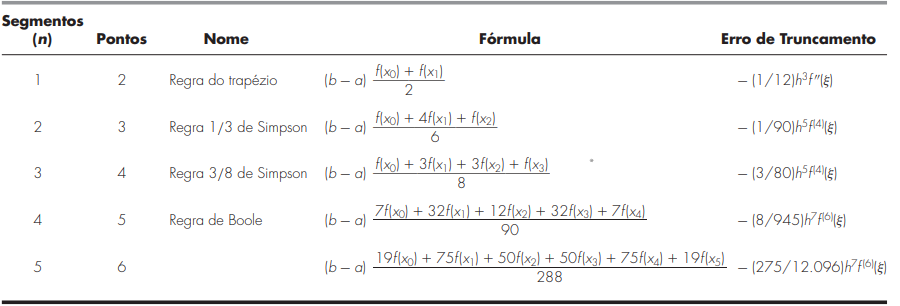

# Exercicios:

# 21.1-

In [ ]:
import sympy as sp
x = sp.symbols('x')

f = lambda x: -sp.exp(-2*x) + 1

f(x)

A = sp.integrate(f(x), (x,0,4))
sp.N(A)   #Resolve analiticamente




3.50016773131395

In [ ]:
f = lambda x: -np.exp(-2*x) + 1

In [ ]:
f = lambda x: -np.exp(-2*x) + 1

A = cn.trapezoidal(f,0,4,1)
print(f'Regra Trapezoidal com 1 intervalo é {A}')


B = cn.trapezoidal(f,0,4,2)
print(f'Regra Trapezio com 2 intervalos é {B}')

B_ = cn.trapezoidal(f,0,4,4)
print(f'Regra Trapezio com 4 intervalos é {B_}')

C = cn.simpson13(f,0,4,2)
print(f'Regra Simpson 1/3 com 2 intervalos é {C}')

C_ = cn.simpson13(f,0,4,4)
print(f'Regra Simpson 1/3 com 4 intervalos é {C_}')

D = cn.simpson38(f,0,4,3)
print(f'Regra Simpson 3/8 com 3 intervalos é {D}')

D_ = integrate(f,0,4,5)  #Obs 
print(f'Regra Simpson 3/8 com 5 intervalos é {D_}')

Regra Trapezoidal com 1 intervalo é 1.999329074744195
Regra Trapezio com 2 intervalos é 2.963033259594629
Regra Trapezio com 4 intervalos é 3.3437025943840353
Regra Simpson 1/3 com 2 intervalos é 3.2842679878781067
Regra Simpson 1/3 com 4 intervalos é 3.470592372647171
Regra Simpson 3/8 com 3 intervalos é 3.388365166861099
Regra Simpson 3/8 com 5 intervalos é 3.4858756525396153


#Exemplo 21.6-

In [ ]:
func = lambda x: 0.2 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5
a = 0 
b = 0.8

In [ ]:
integrate(func,0,0.8,5)


1.6450771626666787

# 22.10-

In [ ]:
f  = lambda x: (x**0.1)*(1.2-x)*(1-np.exp(20*(x-1)))
verdadeiro = 0.602298
#a)
A = trapezoidal(f,0,1,4)
erro = (verdadeiro - A)/verdadeiro
print(erro)

#b)
B = simpson13(f,0,1,4)
erro_2 = ( verdadeiro - B)/B
print(erro_2)

0.20537305494213415
0.1379413452645872


#21.2-

In [ ]:
import sympy as sp
x = sp.symbols('x')

f = lambda x: 3*sp.cos(x) + 6

f(x)

A = sp.integrate(f(x), (x,0,(sp.pi)/2))
sp.N(A)   #Resolve analiticamente


12.4247779607694

In [ ]:
f = lambda x: 3*np.cos(x) + 6

A = trapezoidal(f,0,(np.pi)/2,1)
print(f'Regra Trapezoidal com 1 intervalo é {A}')


B = trapezoidal(f,0,(np.pi)/2,2)
print(f'Regra Trapezio com 2 intervalos é {B}')

B_ = trapezoidal(f,0,(np.pi)/2,4)
print(f'Regra Trapezio com 4 intervalos é {B_}')

C = simpson13(f,0,(np.pi)/2,2)
print(f'Regra Simpson 1/3 com 2 intervalos é {C}')

C_ = simpson13(f,0,(np.pi)/2,4)
print(f'Regra Simpson 1/3 com 4 intervalos é {C_}')

D = cn.simpson38(f,0,(np.pi)/2)
print(f'Regra Simpson 3/8 com 3 intervalos é {D}')

D_ = integrate(f,0,(np.pi)/2,5)   
print(f'Regra Simpson 3/8 e 1/3 5 intervalos é {D_}')

Regra Trapezoidal com 1 intervalo é 11.780972450961723
Regra Trapezio com 2 intervalos é 12.268956307674939
Regra Trapezio com 4 intervalos é 12.386125363687706
Regra Simpson 1/3 com 2 intervalos é 12.43161759324601
Regra Simpson 1/3 com 4 intervalos é 12.42518171569196
Regra Simpson 3/8 com 3 intervalos é 12.427792730712216
Regra Simpson 3/8 e 1/3 5 intervalos é 12.42502871490893


# 21.10-

In [ ]:
x = sp.symbols("x")

xx = np.array([0,0.1,0.2,0.3,0.4,0.5])
yy = np.array([1,8,4,3.5,5,1])

AA,bb = regressao_general(xx,yy,3)

a0,a1,a2,a3  = cn.gauss_elimination_minimal(AA,bb)
f = lambda y: a0 + a1*y + a2*y**2 + a3*y**3

f(x)


212.96296296294*x**3 - 218.650793650776*x**2 + 55.9259259259225*x + 1.82539682539691

In [ ]:
A = sp.integrate(f(x), (x,0,0.5))
sp.N(A)   #Resolve analiticamente



2.12053571428571

In [ ]:
trapezoidal(f,0,0.5,5)

2.0714285714285703

In [ ]:
x = np.array([0,0.1,0.2,0.3,0.4,0.5])
y = np.array([1,8,4,3.5,5,1])
integral = 0
integral13=0
integral38 = 0
b = 0.5
a = 0
soma = 0

# Pela regra do trapezio
# h/2*(func(xi[0]) + 2 * sum(map(func, xi[1:-1])) + func(xi[-1]))
for i in range(1,len(x)-1):
  soma += (y[i])

integraltrapezio = ((0.1)/2)*(y[0] + y[-1] + 2*soma) 
print(integraltrapezio) 

# regra do simpson 
# usando 1/3 + 3/8



2.15


# 21.13- 

In [ ]:
import sympy as sp
x = sp.symbols('x')

f = lambda x: 2*sp.exp(-1.5*x) 

f(x)

A = sp.integrate(f(x), (x,0,0.6))
A_real = sp.N(A)   #Resolve analiticamente


In [ ]:
x = np.array([0,0.05,0.15,0.25,0.35,0.475,0.6])
y = np.array([2,1.8555,1.5970,1.3746,1.1831,0.9808,0.8131])

f = lambda x: 2*np.exp(-1.5*x)

A = cn.trapezoidal(f,0,0.6,6)
B = cn.simpson38(f,0,0.6,6)

print(A,B)

# erros:
errotrap = (A_real - A)/(A_real)
print(f'O erro pela forma trapezoidal é {errotrap}')

errotrap = (A_real - B)/(A_real)
print(f'O erro pela forma simpson é {errotrap}')

0.7927234734867779 0.7912454340607198
O erro pela forma trapezoidal é -0.00187429725146243
O erro pela forma simpson é -0.00000629439697577449


# 21.21-

In [ ]:
v = np.array([5,6,5.5,7,8.5,8,6,7,7,5])
t = np.array([1,2,3.25,4.5,6,7,8,9,9.5,10])

t[1:-1]

array([2.  , 3.25, 4.5 , 6.  , 7.  , 8.  , 9.  , 9.5 ])

In [ ]:
# regressao
cn.polinomial_regression(t,v,2,xi=None)

array([[ 3.44469745],
       [ 1.35259428],
       [-0.11169693]])

In [ ]:
AA, bb = regressao_general(t,v,2)
a0,a1,a2 = cn.gauss_elimination_minimal(AA,bb)
a0,a1,a2

(3.444697453889676, 1.352594279762346, -0.1116969272732972)

In [ ]:
v = np.array([5,6,5.5,7,8.5,8,6,7,7,5])
t = np.array([1,2,3.25,4.5,6,7,8,9,9.5,10])
soma = 0


for i in range(1,len(v)-1):
  soma += 2*(v[i]+v[i+1])
integral13 = 1/2 * (v[0] + v[-1]+soma)
print(integral13)

 # h/2*(func(xi[0]) + 2 * sum(map(func, xi[1:-1])) + func(xi[-1]))


114.0


In [ ]:
import sympy as sp
x = sp.symbols('x')

f = lambda x: a0 + a1*x + a2*x**2

f(x)

A = sp.integrate(f(x), (x,1,10))
sp.N(A)   #Resolve analiticamente



60.7606171512352

In [ ]:
trapezoidal(f,1,10,9)

60.593071760325294